In [1]:
import os
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt

from utils.parse_logs import parse_configs, parse_metrics

In [2]:
PAR_DIR = './results/drop-edge/short-range'

In [22]:
es_test_accs = defaultdict(list)

for exp_dir in os.listdir(PAR_DIR):
    logs = f'{PAR_DIR}/{exp_dir}/logs'
    config, (train, val, test) = parse_configs(logs), parse_metrics(logs)
    if config['dataset'] == 'Cora' and config['gnn'] in ('GAT', 'GCN') and config['dropout'] == 'DropEdge':
        if max(train['Accuracy']) < 0.8:
            continue
        es_test_acc = test['Accuracy'][np.argmax(val['Accuracy'])]
        es_test_accs[(config['gnn'], float(config['drop_p']), len(eval(config['gnn_layer_sizes'])))].append(es_test_acc)

es_test_accs = {exp: (np.mean(samples), np.std(samples)) for exp, samples in es_test_accs.items()}

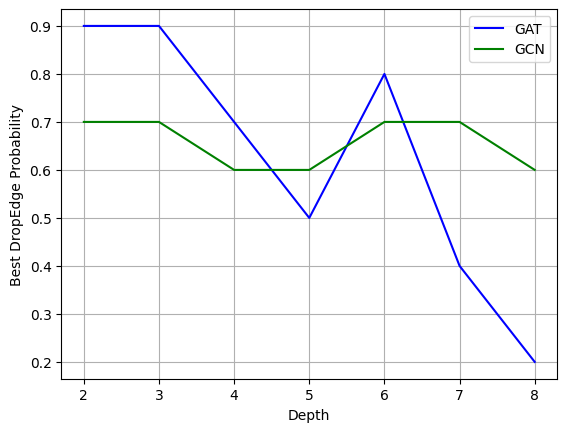

In [31]:
DEPTHS = range(2, 9)
DROP_PS = np.round(np.arange(0.1, 1.0, 0.1), 1)

for gnn, color in zip(('GAT', 'GCN'), ('blue', 'green')):
    best_probs = list()
    for depth in DEPTHS:
        best_probs.append(DROP_PS[np.argmax([es_test_accs[(gnn, drop_p, depth)][0] for drop_p in DROP_PS])])
    plt.plot(DEPTHS, best_probs, color=color, label=gnn)

plt.xlabel('Depth')
plt.ylabel('Best DropEdge Probability')
plt.legend()
plt.grid()
plt.show()

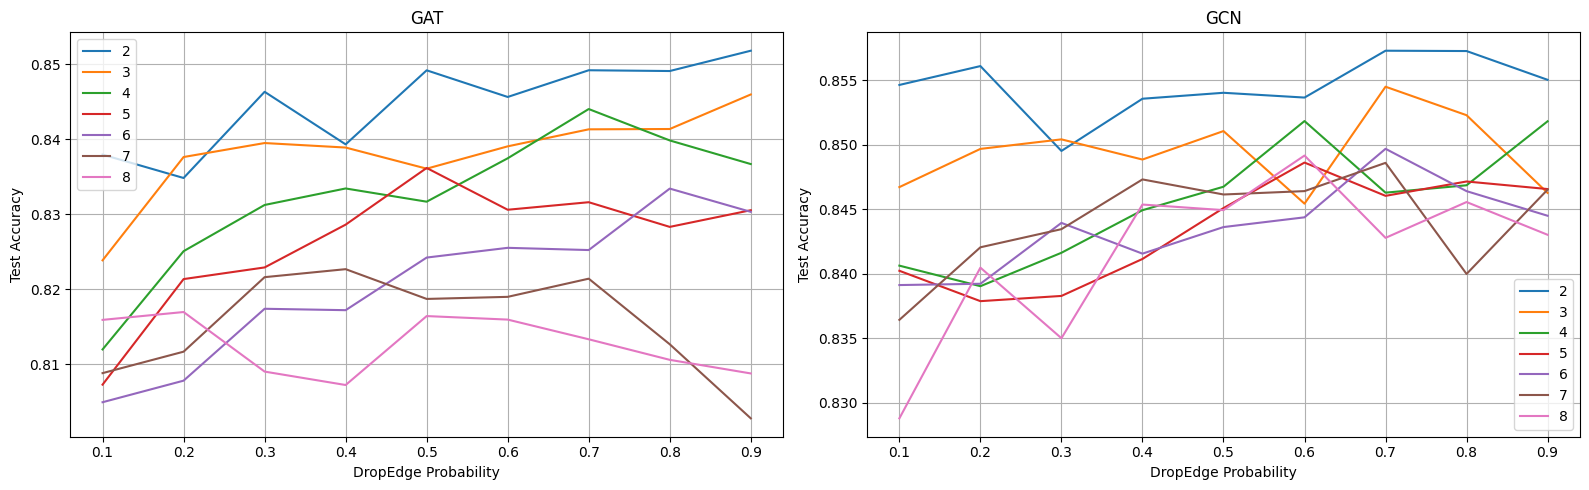

In [24]:
DEPTHS = range(2, 9)
DROP_PS = np.round(np.arange(0.1, 1.0, 0.1), 1)

fig, axs = plt.subplots(1, 2, figsize=(16, 5))
for gnn, ax in zip(('GAT', 'GCN'), axs):
    for depth in DEPTHS:
        lower = ([es_test_accs[(gnn, drop_p, depth)][0]-es_test_accs[(gnn, drop_p, depth)][1] for drop_p in DROP_PS])
        mean = ([es_test_accs[(gnn, drop_p, depth)][0] for drop_p in DROP_PS])
        upper = ([es_test_accs[(gnn, drop_p, depth)][0]+es_test_accs[(gnn, drop_p, depth)][1] for drop_p in DROP_PS])
        ax.plot(DROP_PS, mean, label=depth)
        # ax.fill_between(DROP_PS, lower, upper, alpha=0.2)
    ax.set_xlabel('DropEdge Probability')
    ax.set_ylabel('Test Accuracy')
    ax.set_title(gnn)
    ax.legend()
    ax.grid()

fig.tight_layout()
plt.show()

In [6]:
train_accs = defaultdict(list)

for exp_dir in os.listdir(PAR_DIR):
    logs = f'{PAR_DIR}/{exp_dir}/logs'
    config, (train, val, test) = parse_configs(logs), parse_metrics(logs)
    if config['dataset'] == 'Cora' and config['gnn'] in ('GAT', 'GCN') and config['dropout'] == 'DropEdge':
        train_acc = max(train['Accuracy'])
        train_accs[(config['gnn'], float(config['drop_p']), len(eval(config['gnn_layer_sizes'])))].append(train_acc)

train_accs = {exp: (np.mean(samples), np.std(samples)) for exp, samples in train_accs.items()}

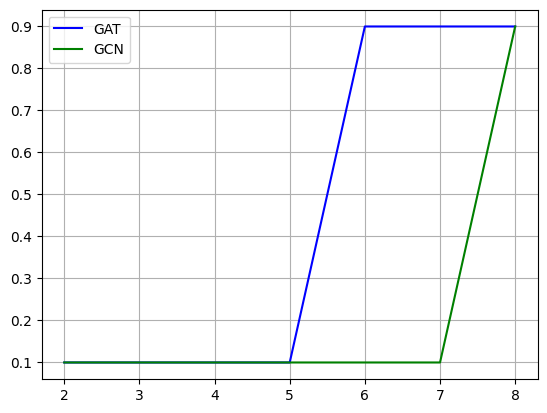

In [7]:
DEPTHS = range(2, 9)
DROP_PS = np.round(np.arange(0.1, 1.0, 0.1), 1)

for gnn, color in zip(('GAT', 'GCN'), ('blue', 'green')):
    best_probs = list()
    for depth in DEPTHS:
        best_probs.append(DROP_PS[np.argmax([train_accs[(gnn, drop_p, depth)][0] for drop_p in DROP_PS])])
    plt.plot(DEPTHS, best_probs, color=color, label=gnn)

plt.legend()
plt.grid()
plt.show()

In [17]:
train_accs = defaultdict(list)

for exp_dir in os.listdir(PAR_DIR):
    logs = f'{PAR_DIR}/{exp_dir}/logs'
    config, (train, val, test) = parse_configs(logs), parse_metrics(logs)
    if config['dataset'] == 'Cora' and config['gnn'] in ('GAT', 'GCN') and config['dropout'] == 'DropEdge':
        train_acc = max(train['Accuracy'])
        if train_acc < 0.8:
            print(f"GNN = {config['gnn']}, DropEdge Prob = {float(config['drop_p'])}, Depth = {len(eval(config['gnn_layer_sizes']))}, Train Acc = {train_acc}")
        else:
            train_accs[(config['gnn'], float(config['drop_p']), len(eval(config['gnn_layer_sizes'])))].append(train_acc)

train_accs = {exp: (np.mean(samples), np.std(samples)) for exp, samples in train_accs.items()}

GNN = GAT, DropEdge Prob = 0.7, Depth = 8, Train Acc = 0.1428571
GNN = GAT, DropEdge Prob = 0.8, Depth = 8, Train Acc = 0.1428571
GNN = GAT, DropEdge Prob = 0.2, Depth = 8, Train Acc = 0.1428571
GNN = GAT, DropEdge Prob = 0.6, Depth = 7, Train Acc = 0.1428571
GNN = GAT, DropEdge Prob = 0.3, Depth = 8, Train Acc = 0.1428571
GNN = GAT, DropEdge Prob = 0.8, Depth = 8, Train Acc = 0.1428571
GNN = GAT, DropEdge Prob = 0.5, Depth = 8, Train Acc = 0.1428571
GNN = GAT, DropEdge Prob = 0.2, Depth = 8, Train Acc = 0.1428571
GNN = GAT, DropEdge Prob = 0.6, Depth = 8, Train Acc = 0.1428571


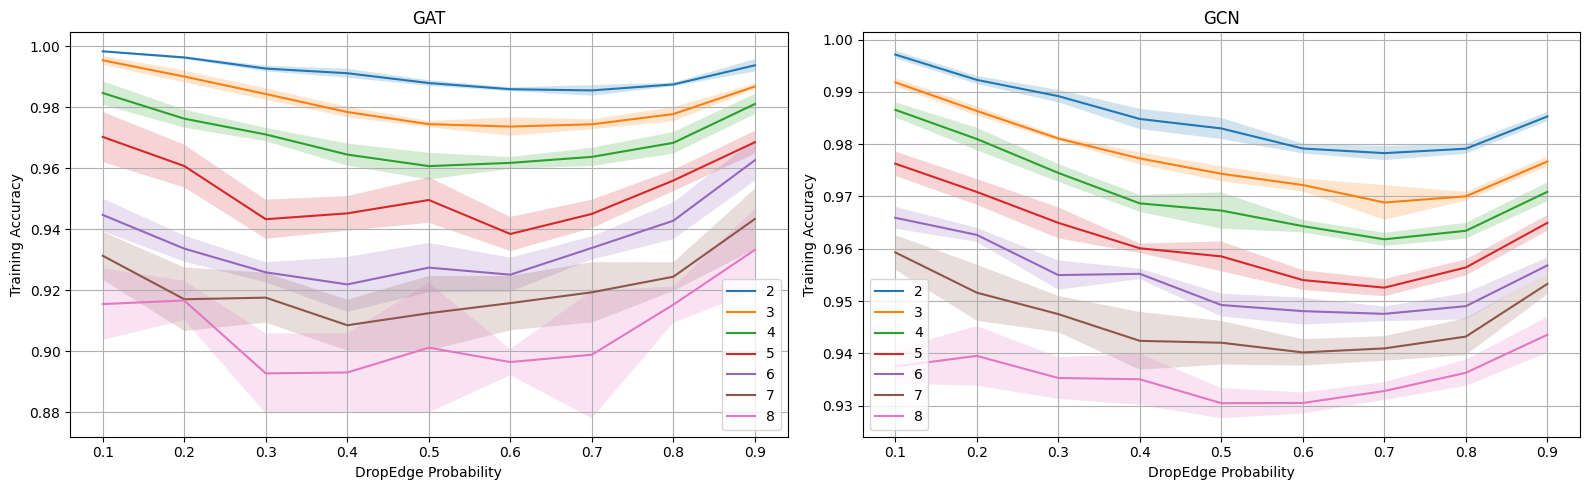

In [20]:
DEPTHS = range(2, 9)
DROP_PS = np.round(np.arange(0.1, 1.0, 0.1), 1)

fig, axs = plt.subplots(1, 2, figsize=(16, 5))
for gnn, ax in zip(('GAT', 'GCN'), axs):
    for depth in DEPTHS:
        lower = ([train_accs[(gnn, drop_p, depth)][0]-train_accs[(gnn, drop_p, depth)][1] for drop_p in DROP_PS])
        mean = ([train_accs[(gnn, drop_p, depth)][0] for drop_p in DROP_PS])
        upper = ([train_accs[(gnn, drop_p, depth)][0]+train_accs[(gnn, drop_p, depth)][1] for drop_p in DROP_PS])
        ax.plot(DROP_PS, mean, label=depth)
        ax.fill_between(DROP_PS, lower, upper, alpha=0.2)
    ax.set_xlabel('DropEdge Probability')
    ax.set_ylabel('Training Accuracy')
    ax.set_title(gnn)
    # ax.set_ylim((0.92, 1.0))
    ax.legend()
    ax.grid()

fig.tight_layout()
plt.show()

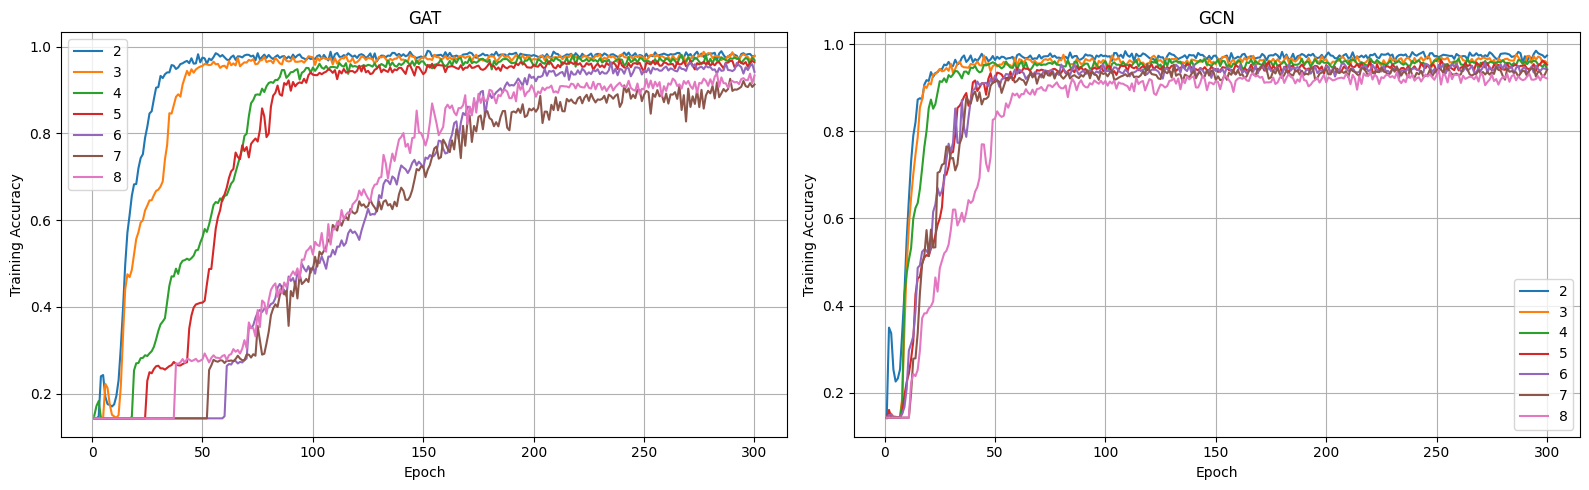

In [104]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

for gnn, ax in zip(('GAT', 'GCN'), axs):
    plotted = set()
    for exp_dir in os.listdir(PAR_DIR):
        logs = f'{PAR_DIR}/{exp_dir}/logs'
        config, (train, val, test) = parse_configs(logs), parse_metrics(logs)
        depth = len(eval(config['gnn_layer_sizes']))
        if config['dataset'] == 'Cora' and config['gnn'] == gnn and config['dropout'] == 'DropEdge' and float(config['drop_p']) == 0.9 and depth not in plotted:
            ax.plot(train['Epoch'], train['Accuracy'], label=depth)
            plotted.add(depth)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Training Accuracy')
    ax.set_title(gnn)
    ax.grid()
    ax.legend()

fig.tight_layout()
plt.show()